In [1]:
# https://towardsdatascience.com/customer-segmentation-in-online-retail-1fc707a6f9e6
# https://www.shopify.com/blog/what-is-customer-segmentation
# https://learn.datacamp.com/courses/customer-segmentation-in-python
# https://cloud.google.com/blog/products/data-analytics/creating-actionable-customer-segmentation-models
#https://www.business2community.com/customer-experience/4-types-of-customer-segmentation-all-marketers-should-know-02120397
# https://www.intercom.com/blog/customer-segmentation/
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import pandas as pd
#As per the Pareto Principle, 80% of outcomes result from 20% of all the causes of any given event.

In [2]:
df = pd.read_csv("online_retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [7]:
df[df.isna().any(axis=1)].index

Int64Index([   622,   1443,   1444,   1445,   1446,   1447,   1448,   1449,
              1450,   1451,
            ...
            541531, 541532, 541533, 541534, 541535, 541536, 541537, 541538,
            541539, 541540],
           dtype='int64', length=135037)

In [8]:
#Sem o CustomerID, será impossível fazer a segmentação dos clientes, então temos que remover a coluna que é possui o valor Nulo
df = df[df['CustomerID'].notna()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


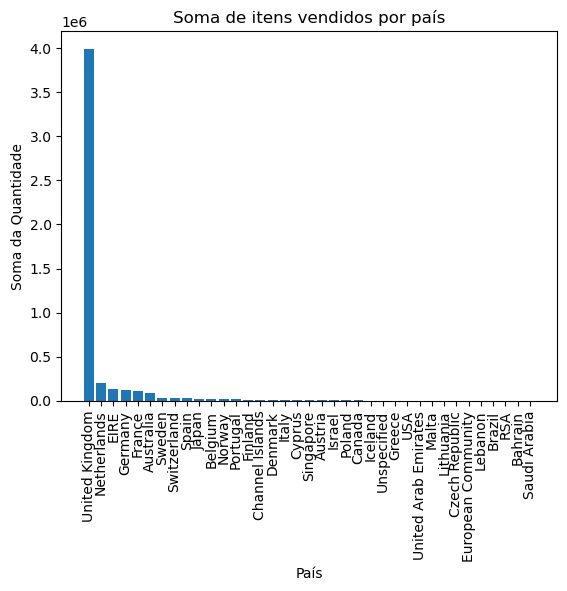

In [10]:
# Assuming you have a dataframe called 'df' with columns 'Country' and 'Quantity'

# Group the dataframe by 'Country' and calculate the sum of 'Quantity'
data = df.groupby('Country')['Quantity'].sum()
data.sort_values(ascending=False,inplace=True)

# Create a bar chart with the grouped data
plt.bar(data.index, data.values)

# Set the labels for X and Y axes
plt.xlabel('País')
plt.ylabel('Soma da Quantidade')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation='vertical')

# Set the title of the chart
plt.title('Soma de itens vendidos por país')

# Display the chart
plt.show()

In [11]:
# Como quase todos os dados estão no Reino Unido, é bom remover os outros países para evitar qualquer variação
df = df[df['Country']=='United Kingdom']

In [12]:
print(df.Country.unique())
print(df.info())

['United Kingdom']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    356728 non-null  object 
 1   StockCode    356728 non-null  object 
 2   Description  356728 non-null  object 
 3   Quantity     356728 non-null  int64  
 4   InvoiceDate  356728 non-null  object 
 5   UnitPrice    356728 non-null  float64
 6   CustomerID   356728 non-null  float64
 7   Country      356728 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.5+ MB
None


In [13]:
# A coluna CustomerID está send lida como float, mas o ID sempre deve ser uma string
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)

In [14]:
# Mudando a coluna InvoiceData para datetime
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [15]:
#Vamos Criar a coluna Total_price, que será a coluna Quantity * Unit Price
df['Total_Price'] = df['UnitPrice']*df['Quantity']

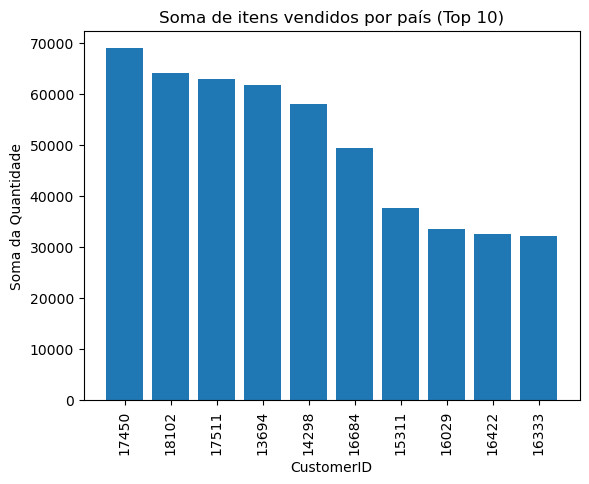

In [16]:
#Assuming you have a dataframe called 'df' with columns 'Country' and 'Quantity'
#Group the dataframe by 'Country' and calculate the sum of 'Quantity'
data = df.groupby('CustomerID')['Quantity'].sum()
data.sort_values(ascending=False,inplace=True)

#Select the top 10 results
top_10_data = data[:10]

#Create a bar chart with the top 10 data
plt.bar(top_10_data.index, top_10_data.values)

#Set the labels for X and Y axes
plt.xlabel('CustomerID')
plt.ylabel('Soma da Quantidade')

#Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation='vertical')

#Set the title of the chart
plt.title('Soma de itens vendidos por país (Top 10)')

#Display the chart
plt.show()

In [17]:
# Removendo as quantidades negativas, são pedidos cancelados
df = df[df['Quantity']>0]

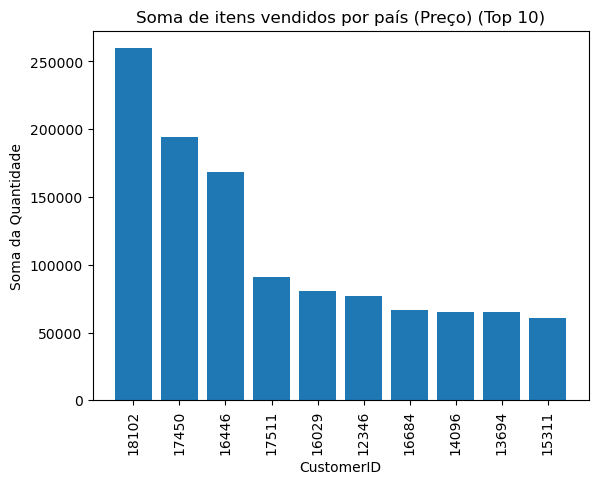

In [18]:
#Assuming you have a dataframe called 'df' with columns 'Country' and 'Quantity'
#Group the dataframe by 'Country' and calculate the sum of 'Quantity'
data = df.groupby('CustomerID')['Total_Price'].sum()
data.sort_values(ascending=False,inplace=True)

#Select the top 10 results
top_10_data = data[:10]

#Create a bar chart with the top 10 data
plt.bar(top_10_data.index, top_10_data.values)

#Set the labels for X and Y axes
plt.xlabel('CustomerID')
plt.ylabel('Soma da Quantidade')

#Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation='vertical')

#Set the title of the chart
plt.title('Soma de itens vendidos por país (Preço) (Top 10)')

#Display the chart
plt.show()

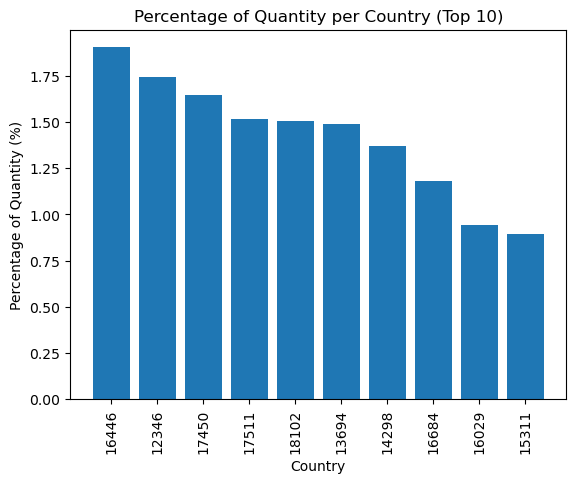

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Group the dataframe by 'Country' and calculate the sum of 'Quantity'
data = df.groupby('CustomerID')['Quantity'].sum()

# Calculate the total sum of 'Quantity'
total_sum = data.sum()

# Calculate the percentage of 'Quantity' for each country
percentage_data = (data / total_sum) * 100
percentage_data = np.clip(percentage_data, 0, 100)  # Clip values to be within 0-100

# Sort the data in descending order
percentage_data.sort_values(ascending=False, inplace=True)

# Select the top 10 results
top_10_percentage_data = percentage_data[:10]

# Create a bar chart with the top 10 data
plt.bar(top_10_percentage_data.index, top_10_percentage_data.values)

# Set the labels for X and Y axes
plt.xlabel('Country')
plt.ylabel('Percentage of Quantity (%)')  # Add the % symbol for the Y axis label

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation='vertical')

# Set the title of the chart
plt.title('Percentage of Quantity per Country (Top 10)')

# Display the chart
plt.show()


In [20]:
# Criando um Dataframe com o tanto que foi gasto, agrupado por CustomerID


### Cohort Analysis

In [21]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [22]:
def get_date_int(df, column):
    date = pd.to_datetime(df[column])  # Convert Series to datetime object
    year = date.dt.year
    month = date.dt.month
    day = date.dt.day
    return year, month, day

In [23]:
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [24]:
#Contando o número de clientes mensais por cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohord_data = cohort_data.reset_index()
cohorts_counts = cohord_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohorts_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
2011-01-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2011-02-01,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
2011-03-01,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04-01,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,256.0,48.0,44.0,44.0,53.0,58.0,68.0,23.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,38.0,31.0,51.0,51.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,169.0,30.0,33.0,39.0,47.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,141.0,32.0,32.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
cohort_sizes = cohorts_counts.iloc[:,0]
retencao = cohorts_counts.divide(cohort_sizes, axis=0)
retencao.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.5,32.3,37.3,36.0,39.6,35.7,34.1,35.5,39.9,36.7,49.7,26.7
2011-01-01,100.0,21.2,26.0,23.5,33.2,27.7,25.1,24.3,30.2,32.7,35.5,12.0,NaN
2011-02-01,100.0,18.8,19.4,28.5,28.8,25.3,25.6,28.2,26.5,30.6,7.4,NaN,NaN
2011-03-01,100.0,15.3,26.0,19.8,22.4,16.5,26.5,22.9,28.4,9.1,NaN,NaN,NaN
2011-04-01,100.0,20.9,20.2,21.7,20.2,22.0,22.0,26.4,7.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.8,17.2,17.2,20.7,22.7,26.6,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.8,14.5,23.8,23.8,32.2,9.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.8,19.5,23.1,27.8,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.7,22.7,24.1,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',
                                    columns='CohortIndex',
                                    values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.4,12.9,13.9,13.9,13.3,13.3,14.3,13.8,16.1,16.1,16.7,12.4,14.5
2011-01-01,18.1,9.6,9.4,15.1,10.1,10.9,13.6,10.8,10.8,8.7,8.6,10.0,NaN
2011-02-01,11.0,14.0,15.9,12.1,12.3,11.9,13.9,13.7,11.0,12.5,13.8,NaN,NaN
2011-03-01,9.7,11.4,13.3,10.1,13.5,12.8,13.1,14.1,11.2,9.7,NaN,NaN,NaN
2011-04-01,10.1,10.2,9.7,11.9,11.9,8.3,9.9,9.4,7.5,NaN,NaN,NaN,NaN
2011-05-01,10.7,9.4,14.8,12.8,11.0,8.3,10.8,126.9,NaN,NaN,NaN,NaN,NaN
2011-06-01,9.5,14.8,12.0,12.7,9.8,8.9,9.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.1,15.0,6.6,8.1,5.8,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.4,6.0,5.0,5.9,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


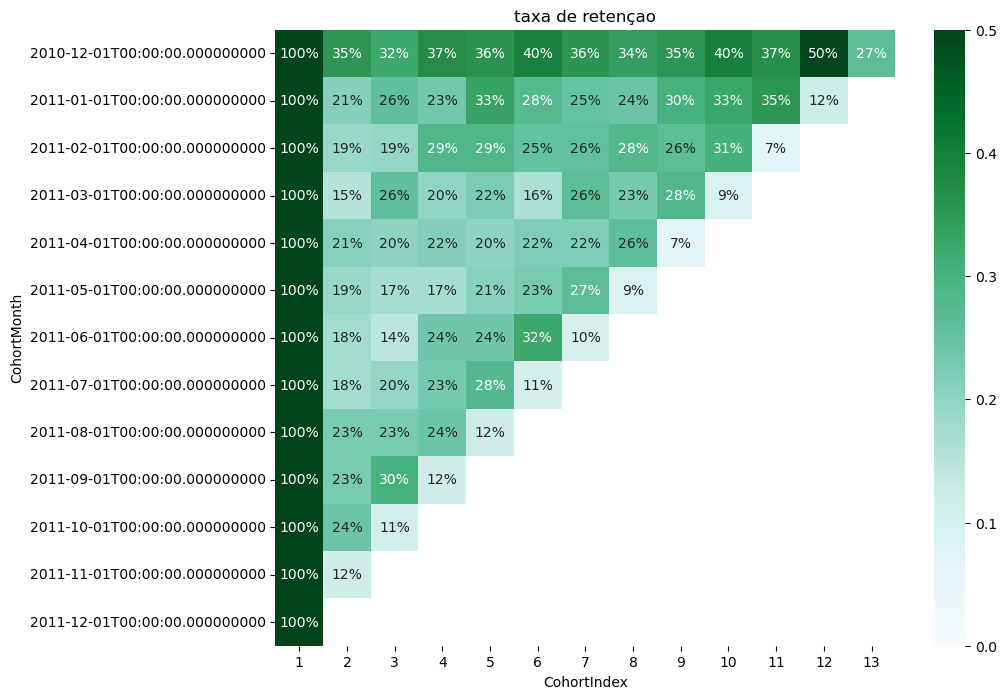

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('taxa de retençao')
sns.heatmap(data=retencao,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'BuGn')
plt.show()

In [28]:
# Agora, vamos calcular o RFM dos clientes, que é Recencia (dias desde a ultima compra), frequência (quantas vezes comprou no ultimo mês)
# e o valor monetário (total gasto nos ultimos 12 meses)
print('Min:{}; Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))
# O dataset tem somente um ano de duração, o que já é perfeito para a analise

Min:2010-12-01 08:26:00; Max:2011-12-09 12:49:00


In [29]:
# Criando uma versão dos dados, como se fosse recente
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [30]:
# Agregando os dados por clientes
datamart = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'InvoiceNo': 'count', 'Total_Price': 'sum'})
datamart

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12346,326,1,77183.60
12747,2,103,4196.01
12748,1,4413,33053.19
12749,4,199,4090.88
12820,3,59,942.34
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


In [31]:
datamart.rename (columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total_Price': 'MonetaryValue'}, inplace=True)

In [32]:
datamart

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12747,2,103,4196.01
12748,1,4413,33053.19
12749,4,199,4090.88
12820,3,59,942.34
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05
